# Base de datos Covid 19 (MINSA)

Instalando librerías requeridas

In [ ]:
# xlrd is needed to load excel files
!pip install xlrd
!pip install psycopg2
!pip install geneticalgorithm

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp36-none-any.whl size=15078 sha256=71f07e3c9f6d8b1230d73e9bddd826a760f683ae86d97424040371dfcb8c8dba
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


Importando librerías requeridas

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import psycopg2 as ps
from google.colab import files
import io
from natsort import index_natsorted
from datetime import date,timedelta,datetime
from scipy.integrate import odeint
from geneticalgorithm import geneticalgorithm as ga

Cargamos la base de datos con el nombre Covid_19_20210201 y en formato .xlsx

In [ ]:
uploaded = files.upload()

NameError: ignored

Obtenemos la cuenta acumulada de las personas fallecidas en Lima para cada grupo de edad, desde el primer fallecido hasta el 11 de Febrero de 2020.

In [ ]:
column_names = ["FECHA_CORTE", "UUID" , "FECHA_FALLECIMIENTO", "EDAD", "SEXO", "FECHA_NACIMIENTO", "DEPARTAMENTO", "PROVINCIA", "DISTRITO"]
Datos_muertes_covid_19 = pd.read_excel(io.BytesIO(uploaded['muertes_Covid_19_20210201.xlsx']), header=None, names=column_names,skiprows=1)

Datos_muertes_covid = []

for z in range(3):
  dm=Datos_muertes_covid_19
  if (z == 0): dmf=dm[(dm.DEPARTAMENTO=='LIMA')&((0)<=pd.to_numeric(dm.EDAD))&(dm.EDAD.astype(int)<(15))]
  if (z == 1): dmf=dm[(dm.DEPARTAMENTO=='LIMA')&((15)<=pd.to_numeric(dm.EDAD))&(dm.EDAD.astype(int)<(60))]
  if (z == 2): dmf=dm[(dm.DEPARTAMENTO=='LIMA')&((60)<=pd.to_numeric(dm.EDAD))&(dm.EDAD.astype(int)<(120))]
  dmf1=dmf.sort_values(by='FECHA_FALLECIMIENTO', ascending=True)
  dmf2=dmf1.groupby(['FECHA_FALLECIMIENTO']).size().reset_index(name='CUENTA')
  #print(dmf2)
  #print(dmf2.CUENTA.sum())

  head=list(dmf2.to_dict().keys())
  valor1=list(dmf2.to_dict().values())
  valor2=list(zip(valor1[0].values(),valor1[1].values()))

  data=[{head[0]:x,head[1]:y} for x,y in valor2]
  datatime={str(x):y for x,y in valor2}

  fecha_inicio=datetime.strptime(str(data[0]['FECHA_FALLECIMIENTO']),'%Y%m%d')
  fecha_fin=datetime.strptime(str(data[-1]['FECHA_FALLECIMIENTO']),'%Y%m%d')
  delta=(fecha_fin-fecha_inicio).days+1
  fechas=[(fecha_inicio+timedelta(days=x)).strftime('%Y%m%d') for x in range(delta)]

  lista=[]
  counter=0
  for x in fechas:
    if x in datatime.keys():counter+=datatime[x]
    lista.append([x,counter])

  print(lista[0:10])
  print(len(lista))
  fecha=[x for x,y in lista]
  cantidad=[y for x,y in lista]

  Datos_muertes_covid.append(lista)






#dmf1.groupby(by=['FECHA_FALLECIMIENTO']).agg(['count'])



#dmf3.head()

#Datos_muertes_covid_19.head()


[['20200409', 1], ['20200410', 1], ['20200411', 1], ['20200412', 1], ['20200413', 1], ['20200414', 1], ['20200415', 1], ['20200416', 1], ['20200417', 1], ['20200418', 2]]
296
[['20200319', 1], ['20200320', 1], ['20200321', 1], ['20200322', 1], ['20200323', 2], ['20200324', 3], ['20200325', 3], ['20200326', 4], ['20200327', 4], ['20200328', 5]]
329
[['20200318', 1], ['20200319', 3], ['20200320', 5], ['20200321', 5], ['20200322', 5], ['20200323', 5], ['20200324', 6], ['20200325', 6], ['20200326', 8], ['20200327', 14]]
330


Graficamos las curvas de fallecimientos acumulados para cada grupo de edad.

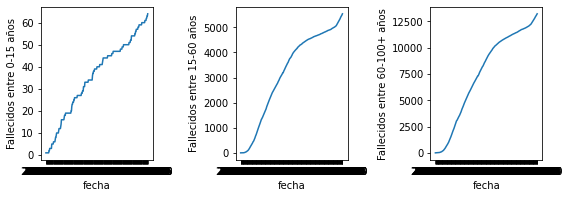

In [ ]:
# Graficamos los resultados
fig = plt.figure(1, figsize=(8,8))
fecha = []
cantidad = []

for z in range(3):
  fecha.append([x for x,y in Datos_muertes_covid[z]])
  cantidad.append([y for x,y in Datos_muertes_covid[z]])




ax2 = fig.add_subplot(331)
ax2.plot(fecha[0], cantidad[0])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 0-15 años')


ax1 = fig.add_subplot(332)
ax1.plot(fecha[1], cantidad[1])
ax1.set_xlabel('fecha')
ax1.set_ylabel('Fallecidos entre 15-60 años')


ax2 = fig.add_subplot(333)
ax2.plot(fecha[2], cantidad[2])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 60-100+ años')
"""
ax2 = fig.add_subplot(334)
ax2.plot(fecha[3], cantidad[3])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 30-40 años')

ax2 = fig.add_subplot(335)
ax2.plot(fecha[4], cantidad[4])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 40-50 años')

ax2 = fig.add_subplot(336)
ax2.plot(fecha[5], cantidad[5])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 50-60 años')

ax2 = fig.add_subplot(337)
ax2.plot(fecha[6], cantidad[6])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 60-70 años')

ax2 = fig.add_subplot(338)
ax2.plot(fecha[7], cantidad[7])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 70-80 años')

ax2 = fig.add_subplot(339)
ax2.plot(fecha[8], cantidad[8])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 80-100+ años')
"""

plt.tight_layout()
plt.show()

In [ ]:
def f(y, t, params):

    [S_1, S_2, S_3, 
     E_1, E_2, E_3, 
     I_1, I_2, I_3,          # desempacamos los valores de y
     A_1, A_2, A_3, 
     R_1, R_2, R_3, 
     M_1, M_2, M_3] = y      

    S = np.array([S_1, S_2, S_3])
    E = np.array([E_1, E_2, E_3])
    I = np.array([I_1, I_2, I_3])  #trabajamos con matrices
    A = np.array([A_1, A_2, A_3])
    R = np.array([R_1, R_2, R_3])
    M = np.array([M_1, M_2, M_3])
    
    mu, beta_1, N, sigma, p, gamma, delta, w, C = params  # desempacamos los parámetros excepto C

    derivs = np.zeros(18)
    
    for i in range(18):
        if (i<3):               derivs[i] = mu*R[i] - S[i]*beta_1*(1/N)*((C@A)[i]+(C@I)[i])
        if (i>=3 and i<6):      derivs[i] = S[i-3]*beta_1*(1/N)*((C@A)[i-3]+(C@I)[i-3]) - sigma*E[i-3]
        if (i>=6 and i<9):      derivs[i] = p*sigma*E[i-6] - w*I[i-6]
        if (i>=9 and i<12):     derivs[i] = (1-p)*sigma*E[i-9] - gamma*A[i-9]
        if (i>=12 and i<15):    derivs[i] = gamma*A[i-12] + (1-delta[i-15])*w*I[i-12] - mu*R[i-12]
        if (i>=15):             derivs[i] = delta[i-15]*w*I[i-15]            
        
    return(derivs)

In [ ]:
# Parametros
mu     =  1/80                 # 1/mu tiempo promedio de inmunización natural al superar el virus        
#beta_1 =  0.6                  # fuerza de la enfermedad
N      =  9031034               # número total de suceptibles
sigma  =  1/5                  # 1/sigma tiempo promedio de incubación del virus  
p      =  1-0.79               # porcentaje de la población que desarrolla síntomas
gamma  =  1/10                 # 1/gamma tiempo promedio que tarda un asintomático en curarse
delta  =  [0.000011, 0.00098, 0.022]               # probabilidad de morir dado que se presenta una infección con síntomas
w      =  1/15                 # 1/w tiempo promedio en que un infectado con síntomas supera la enfermedad o muere
#C      = np.zeros((9,9))       # constantes de interacción social 
#for i in range(9):
#    for j in range(9):
#        C[i][j] = N/11000000
#

In [ ]:
# Valores iniciales
S_1_0, S_2_0, S_3_0  = 2135096,5894253,1001685	       #Susceptibles
E_1_0, E_2_0, E_3_0  = 0,0,0                                                           #Expuestos
I_1_0, I_2_0, I_3_0  = 1,0,0                                                           #Infectados con síntomas
A_1_0, A_2_0, A_3_0  = 0,0,0                                                           #Asintomáticos
R_1_0, R_2_0, R_3_0  = 0,0,0                                                           #Recuperados
M_1_0, M_2_0, M_3_0  = 0,0,0                                                           #Muertos

In [ ]:
# Valores iniciales para el solver
y0 = [S_1_0, S_2_0, S_3_0,
      E_1_0, E_2_0, E_3_0,
      I_1_0, I_2_0, I_3_0,
      A_1_0, A_2_0, A_3_0,
      R_1_0, R_2_0, R_3_0,
      M_1_0, M_2_0, M_3_0]

In [ ]:
# Creamos una discretización del tiempo
t_f = 400.
h = 1
t = np.arange(0., t_f, h)

In [ ]:
Datos_muertes_covid_adaptado = cantidad

In [ ]:
def solver_EDO(C,beta_1):
    # Parámetros para el solver
    params = [mu, beta_1, N, sigma, p, gamma, delta, w, C]
    # Usamos el solver odeint
    sol = odeint(f, y0, t, args=(params,))
    return(sol)

def error_solver_EDO(C,beta_1):

    sol = solver_EDO(C,beta_1)
    #Solo usaremos el resultado del estado M_i para i desde 1 a 3, en python corresponde a sol[:,15],...,sol[:,17]
    sol_muertes = sol[:,15:18]
    #Calculamos el error de la simulación en cada grupo de edad
    error = np.zeros(3)
    for i in range(3):
        #Hacemos que coincida la fecha del primer muerto en la curva simulada y la curva real
        arr = abs(sol_muertes[:,i] - 1)  
        ubic = np.where(arr == np.amin(arr))[0][0]  #ubicación de sol_muertes[:,i] en que se da la primera muerte en el grupo de edad i
        M = sol_muertes[ubic:,i]
        #Buscamos medir la distancia de M a Datos_muertes_covid[i]
        #Primero haremos que coincidan en dimensión
        aux = Datos_muertes_covid_adaptado[i]
        if(len(M)>len(aux)): M = M[:len(aux)]
        else: aux = aux[:len(M)]       
        #Como medida de su distancia usamos la norma L_1
        error[i] = sum(abs(M-aux))
        if(len(M)<200): error[i] = 19000000
        if(sum(M)<2000): error[i] = 19000000
        
    return(error)

In [ ]:
Datos_muertes_covid_adaptado[1]

[1,
 1,
 1,
 1,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 8,
 12,
 14,
 19,
 28,
 33,
 36,
 42,
 49,
 60,
 73,
 79,
 88,
 102,
 118,
 133,
 152,
 172,
 197,
 215,
 242,
 264,
 280,
 304,
 319,
 346,
 367,
 386,
 414,
 440,
 455,
 473,
 502,
 529,
 560,
 595,
 634,
 670,
 697,
 727,
 766,
 799,
 842,
 878,
 909,
 954,
 986,
 1019,
 1050,
 1090,
 1123,
 1160,
 1194,
 1230,
 1261,
 1302,
 1340,
 1352,
 1385,
 1403,
 1431,
 1460,
 1487,
 1524,
 1550,
 1579,
 1609,
 1638,
 1676,
 1702,
 1728,
 1753,
 1800,
 1839,
 1873,
 1909,
 1945,
 1984,
 2010,
 2045,
 2076,
 2100,
 2130,
 2153,
 2183,
 2212,
 2244,
 2276,
 2311,
 2336,
 2371,
 2399,
 2417,
 2442,
 2464,
 2487,
 2513,
 2539,
 2550,
 2568,
 2591,
 2621,
 2646,
 2672,
 2695,
 2714,
 2734,
 2758,
 2778,
 2811,
 2837,
 2858,
 2882,
 2908,
 2946,
 2971,
 2996,
 3017,
 3039,
 3058,
 3079,
 3097,
 3122,
 3148,
 3173,
 3195,
 3195,
 3227,
 3254,
 3289,
 3308,
 3340,
 3360,
 3392,
 3420,
 3450,
 3466,
 3495,
 3516,
 3548,
 3573,
 3586,
 3608,
 3645,
 3672,
 3

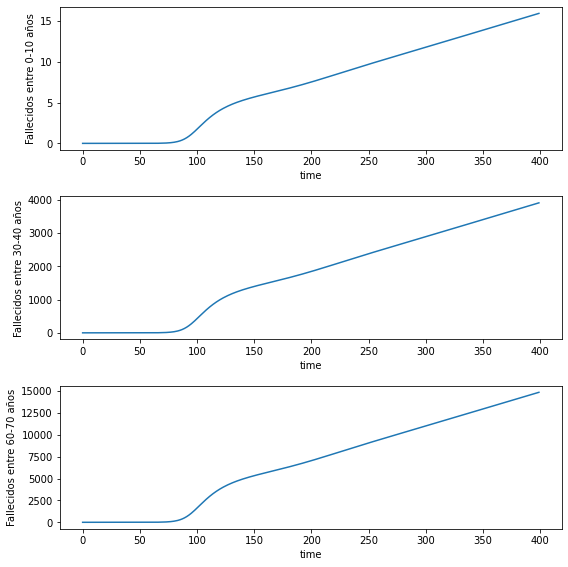

In [ ]:
beta_1 = 0.6
C      = np.zeros((3,3))       # constantes de interacción social 
for i in range(3):
    for j in range(3):
        C[i][j] = N/11000000

sol = solver_EDO(C,beta_1)  
    
# Graficamos los resultados
fig = plt.figure(1, figsize=(8,8))

# Graficamos la curva de muertos
ax2 = fig.add_subplot(311)
ax2.plot(t, sol[:,15])
ax2.set_xlabel('time')
ax2.set_ylabel('Fallecidos entre 0-10 años')

# Graficamos la curva de infectados con síntomas 
ax1 = fig.add_subplot(312)
ax1.plot(t, sol[:,16])
ax1.set_xlabel('time')
ax1.set_ylabel('Fallecidos entre 30-40 años')

# Graficamos la curva de muertos
ax2 = fig.add_subplot(313)
ax2.plot(t, sol[:,17])
ax2.set_xlabel('time')
ax2.set_ylabel('Fallecidos entre 60-70 años')


plt.tight_layout()
plt.show()

In [ ]:
def  error_solver_EDO_adaptado(X):
    [C_1_1, C_1_2, C_1_3,
     C_2_1, C_2_2, C_2_3,
     C_3_1, C_3_2, C_3_3, beta_1] = X

    C_1 = np.array([C_1_1, C_1_2, C_1_3])
    C_2 = np.array([C_2_1, C_2_2, C_2_3])
    C_3 = np.array([C_3_1, C_3_2, C_3_3])

    C = np.array([C_1,C_2,C_3])

    error = error_solver_EDO(C,beta_1)

    return(np.mean(error))

In [ ]:
error_solver_EDO(C, beta_1)

array([  7750.74993691, 389205.64879795, 212175.54514669])

In [ ]:
a = [[[0,1]]*9]
varbound=np.array(a[0])
len(varbound)

9

 The best solution found:
 [0.98542616 0.00355154 0.23577112 0.98118001 0.97827545 0.97767346
 0.99995232 0.46368973 0.58337075 0.79832491]

 Objective function:
 184547.50700215236


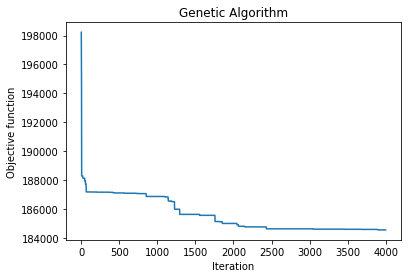

[198232.30226005567, 197204.57799500806, 197204.57799500806, 194701.44212760506, 189018.06536146763, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188281.63228746367, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 188129.21351090135, 187937.4121993983, 187937.4121993983, 187934.92076869062, 187934.92076869062, 187934.92076869062, 1

In [ ]:
a = [[[0,1]]*9]
a[0].append([0.5,0.8])
varbound=np.array(a[0])

algorithm_param = {'max_num_iteration': 4000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=error_solver_EDO_adaptado,dimension=10,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

convergence=model.report
print(convergence)
#solution=model.output_dict
#print(solution)

In [ ]:
solution=model.output_dict
print(solution)

{'variable': array([0.98542616, 0.00355154, 0.23577112, 0.98118001, 0.97827545,
       0.97767346, 0.99995232, 0.46368973, 0.58337075, 0.79832491]), 'function': 184547.50700215236}


In [ ]:
C=[[0.98542616, 0.00355154, 0.23577112],
   [0.98118001, 0.97827545, 0.97767346],  
   [0.99995232, 0.46368973, 0.58337075]]
 
beta_1 = 0.79832491

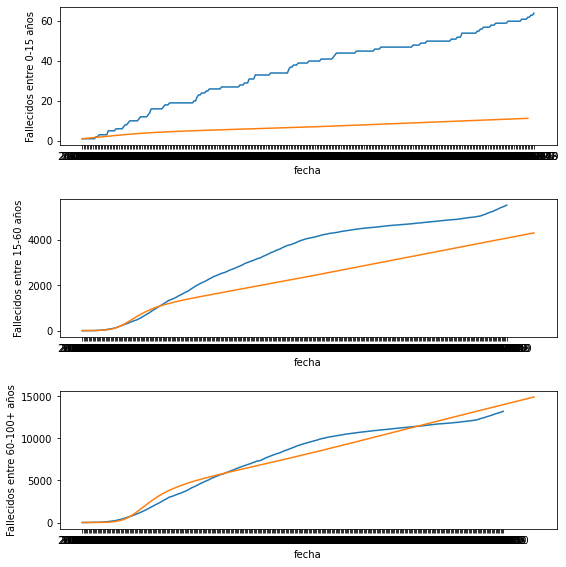

In [ ]:
sol = solver_EDO(C,beta_1)  
sol_muertes = sol[:,15:18]
M = []
for i in range(3):
  arr = abs(sol_muertes[:,i] - 1)  
  ubic = np.where(arr == np.amin(arr))[0][0]  #ubicación de sol_muertes[:,i] en que se da la primera muerte en el grupo de edad i
  M.append(sol_muertes[ubic:,i])

# Graficamos los resultados
fig = plt.figure(1, figsize=(8,8))

# Graficamos la curva de muertos
ax2 = fig.add_subplot(311)
ax2.plot(fecha[0], cantidad[0])
ax2.set_xlabel('time')
ax2.set_ylabel('Fallecidos entre 0-10 años')
ax2.plot(np.arange(len(M[0])), M[0])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 0-15 años')

# Graficamos la curva de infectados con síntomas 
ax1 = fig.add_subplot(312)
ax1.plot(fecha[1], cantidad[1])
ax1.set_xlabel('time')
ax1.set_ylabel('Fallecidos entre 15-60 años')
ax1.plot(np.arange(len(M[1])), M[1])
ax1.set_xlabel('fecha')
ax1.set_ylabel('Fallecidos entre 15-60 años')

# Graficamos la curva de muertos
ax2 = fig.add_subplot(313)
ax2.plot(fecha[2], cantidad[2])
ax2.set_xlabel('time')
ax2.set_ylabel('Fallecidos entre 60-100+ años')
ax2.plot(np.arange(len(M[2])), M[2])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 60-100+ años')

plt.tight_layout()
plt.show()

In [ ]:
C=[[0.6098891,  0.77659967, 0.35743617],
   [0.93157502, 0.99612857, 0.9589724],  
   [0.02810427, 0.64180142, 0.75097843]]
 
beta_1 = 0.78274477

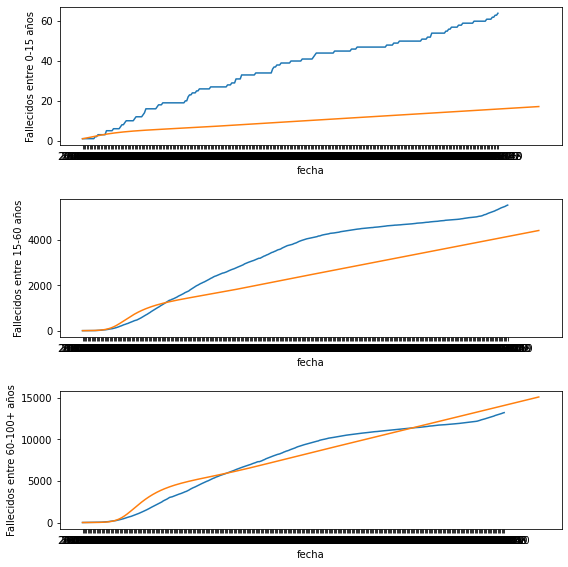

In [ ]:
sol = solver_EDO(C,beta_1)  
sol_muertes = sol[:,15:18]
M = []
for i in range(3):
  arr = abs(sol_muertes[:,i] - 1)  
  ubic = np.where(arr == np.amin(arr))[0][0]  #ubicación de sol_muertes[:,i] en que se da la primera muerte en el grupo de edad i
  M.append(sol_muertes[ubic:,i])

# Graficamos los resultados
fig = plt.figure(1, figsize=(8,8))

# Graficamos la curva de muertos
ax2 = fig.add_subplot(311)
ax2.plot(fecha[0], cantidad[0])
ax2.set_xlabel('time')
ax2.set_ylabel('Fallecidos entre 0-10 años')
ax2.plot(np.arange(len(M[0])), M[0])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 0-15 años')

# Graficamos la curva de infectados con síntomas 
ax1 = fig.add_subplot(312)
ax1.plot(fecha[1], cantidad[1])
ax1.set_xlabel('time')
ax1.set_ylabel('Fallecidos entre 15-60 años')
ax1.plot(np.arange(len(M[1])), M[1])
ax1.set_xlabel('fecha')
ax1.set_ylabel('Fallecidos entre 15-60 años')

# Graficamos la curva de muertos
ax2 = fig.add_subplot(313)
ax2.plot(fecha[2], cantidad[2])
ax2.set_xlabel('time')
ax2.set_ylabel('Fallecidos entre 60-100+ años')
ax2.plot(np.arange(len(M[2])), M[2])
ax2.set_xlabel('fecha')
ax2.set_ylabel('Fallecidos entre 60-100+ años')

plt.tight_layout()
plt.show()

In [ ]:

intervalo = np.linspace(0., 1, num=5)
intervalo_beta = np.linspace(0.5, 0.8, num=5)
err_opt = 19000000
contador = 0
C_res = []
beta_1_res = []
for a1 in (intervalo):
  for a2 in (intervalo):
    for a3 in (intervalo):      
      for a5 in (intervalo):
        for a6 in (intervalo):     
          for a9 in (intervalo):
            for b1 in (intervalo_beta):
              a4 = a2
              a7 = a3
              a8 = a6
              C=[[a1, a2, a3],
                 [a4, a5, a6],  
                 [a7, a8, a9]] 
              beta_1 = b1
              err_nuevo = error_solver_EDO_adaptado([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
              if(err_nuevo<err_opt): 
                err_opt = err_nuevo
                C_opt = C
                beta_1_opt = beta_1 
              if(err<19000000): 
                C_res.append(C)
                beta_1_res.append(beta_1)
              contador = contador + 1
              print('error:')
              print(err_nuevo)
              print('contador:')
              print(contador)




Se truncaron las últimas líneas 5000 del resultado de transmisión.
error:
1214581.8693083713
contador:
25926
error:
1399833.5621165766
contador:
25927
error:
1516853.4796985078
contador:
25928
error:
1614229.0499526688
contador:
25929
error:
1686341.611763547
contador:
25930
error:
1218147.4541564498
contador:
25931
error:
1399504.9033359457
contador:
25932
error:
1520401.987868868
contador:
25933
error:
1613295.9939257025
contador:
25934
error:
1685297.2411327732
contador:
25935
error:
1222427.808645935
contador:
25936
error:
1403508.6319691704
contador:
25937
error:
1524226.9807265336
contador:
25938
error:
1617003.3445391369
contador:
25939
error:
1679552.8817150723
contador:
25940
error:
1221259.6117573425
contador:
25941
error:
1407794.2129859386
contador:
25942
error:
1518909.273824934
contador:
25943
error:
1616608.343215415
contador:
25944
error:
1679041.1001241736
contador:
25945
error:
1226040.1896617846
contador:
25946
error:
1406383.3845548416
contador:
25947
error:
1523270

KeyboardInterrupt: ignored

In [ ]:
C_res

[]